# Задача 2. Построение вектора по матрице

In [4]:
import task2
import numpy as np
import IPython

## Тестирование реализаций с помощью unittest

In [3]:
import unittest

### I вариант - без векторизации

In [8]:
class TestNvec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = [[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]]
        i = [0, 2, 1]
        j = [1, 2, 0]
        answer = np.array([2, 9, 4])
        np.testing.assert_equal(task2.build_nvec(X, i, j), answer)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.eye(141)
        i = [    x for x in range(141)]
        j = [140-x for x in range(141)]
        answer = np.zeros(141)
        answer[70] = 1
        np.testing.assert_equal(task2.build_nvec(X, i, j), answer)
        
    def test_rand(self):
        """ Test to check solution on big random data"""
        X = np.random.random ((141,169))
        i = np.random.randint(0, 140, size = 141)
        j = np.random.randint(0, 140, size = 141)
        func_ans = task2.build_nvec(X, i, j)
        for idx in range(141):
            if func_ans[idx] != X[i[idx]][j[idx]]:
                self.assertTrue (False)
        self.assertTrue(True)

In [9]:
test_nvec = TestNvec()
suite_nvec = unittest.TestLoader().loadTestsFromModule(test_nvec)
print (unittest.TextTestRunner().run(suite_nvec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


### II вариант - с векторизацией

In [11]:
class TestVec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = [[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]]
        i = [0, 2, 1]
        j = [1, 2, 0]
        answer = np.array([2, 9, 4])
        np.testing.assert_equal(task2.build_vec(X, i, j), answer)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.eye(141)
        i = [    x for x in range(141)]
        j = [140-x for x in range(141)]
        answer = np.zeros(141)
        answer[70] = 1
        np.testing.assert_equal(task2.build_vec(X, i, j), answer)
        
    def test_rand(self):
        """ Test to check solution on big random data"""
        X = np.random.random ((141,169))
        i = np.random.randint(0, 140, size = 141)
        j = np.random.randint(0, 140, size = 141)
        func_ans = task2.build_vec(X, i, j)
        for idx in range(141):
            if func_ans[idx] != X[i[idx]][j[idx]]:
                self.assertTrue (False)
        self.assertTrue(True)

In [12]:
test_vec = TestVec()
suite_vec = unittest.TestLoader().loadTestsFromModule(test_vec)
print (unittest.TextTestRunner().run(suite_vec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.011s

OK


### III вариант - гибридная реализация

In [13]:
class TestHybr(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = [[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]]
        i = [0, 2, 1]
        j = [1, 2, 0]
        answer = np.array([2, 9, 4])
        np.testing.assert_equal(task2.build_hybr(X, i, j), answer)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.eye(141)
        i = [    x for x in range(141)]
        j = [140-x for x in range(141)]
        answer = np.zeros(141)
        answer[70] = 1
        np.testing.assert_equal(task2.build_hybr(X, i, j), answer)
        
    def test_rand(self):
        """ Test to check solution on big random data"""
        X = np.random.random ((141,169))
        i = np.random.randint(0, 140, size = 141)
        j = np.random.randint(0, 140, size = 141)
        func_ans = task2.build_hybr(X, i, j)
        for idx in range(141):
            if func_ans[idx] != X[i[idx]][j[idx]]:
                self.assertTrue (False)
        self.assertTrue(True)

In [14]:
test_hybr = TestHybr()
suite_hybr = unittest.TestLoader().loadTestsFromModule(test_hybr)
print (unittest.TextTestRunner().run(suite_hybr))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


## Дискретные тесты (на основе тестов из unittest)

### I вариант - без векторизации

In [3]:
X = [[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]]
i = [0, 2, 1]
j = [1, 2, 0]

%timeit build_nvec (X, i, j)

X = np.eye(141)
i = [    x for x in range(141)]
j = [140-x for x in range(141)]
%timeit build_nvec (X, i, j)

rX = np.random.random ((141,169))
ri = np.random.randint(0, 140, size = 141)
rj = np.random.randint(0, 140, size = 141)
     
%timeit build_nvec (rX, ri, rj)

The slowest run took 12.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.56 µs per loop
10000 loops, best of 3: 44.6 µs per loop
10000 loops, best of 3: 91.1 µs per loop


### II вариант - с векторизацией

In [4]:
def build_vec (X, i, j):
    return np.array(X)[i, j]

In [5]:
X = [[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]]
i = [0, 2, 1]
j = [1, 2, 0]

%timeit build_vec (X, i, j)

X = np.eye(141)
i = [    x for x in range(141)]
j = [140-x for x in range(141)]
%timeit build_vec (X, i, j)

%timeit build_vec (rX, ri, rj)

The slowest run took 14.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.28 µs per loop
The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 34.5 µs per loop
The slowest run took 8.40 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.7 µs per loop


### III вариант - гибридная реализация

In [6]:
def build_hybr (X, i, j):
    all_indices = [(i[x], j[x]) for x in range(len(i))]
    X = np.array (X)

    return np.array([X[all_indices[x]] for x in range(len(i))])

In [7]:
X = [[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]]
i = [0, 2, 1]
j = [1, 2, 0]

%timeit build_hybr (X, i, j)

X = np.eye (141)
i = [    x for x in range(141)]
j = [140-x for x in range(141)]
%timeit build_hybr (X, i, j)

%timeit build_hybr (rX, ri, rj)

The slowest run took 7.05 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.14 µs per loop
10000 loops, best of 3: 62.8 µs per loop
10000 loops, best of 3: 98.7 µs per loop


## Непрерывные тесты

In [5]:
import time
import matplotlib.pyplot as plt

In [21]:
def get_measures (begin, end, step):
    x_axis = []
    nvec_dots = []
    vec_dots = []
    hybr_dots = []
    start = time.time()

    for i in range (begin, end, step):
        X = np.eye(i)
        p = [  x for x in range(i)]
        q = [i-1-x for x in range(i)]
        x_axis.append(i)

        start = time.time()
        task2.build_nvec(X, p, q)
        nvec_dots.append(time.time()-start)

        start = time.time()
        task2.build_vec(X, p, q)
        vec_dots.append(time.time()-start)

        start = time.time()
        task2.build_hybr(X, p, q)
        hybr_dots.append(time.time()-start)
    
    return (x_axis, nvec_dots, vec_dots, hybr_dots)

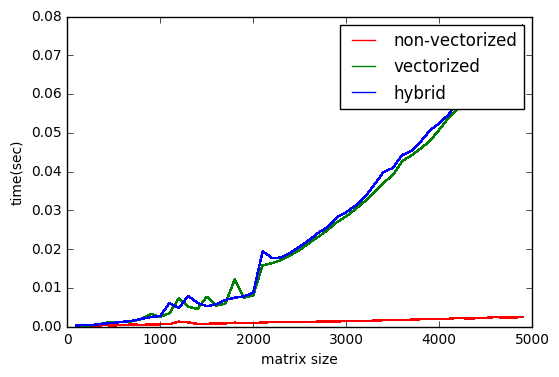

In [22]:
x_axis, nvec_dots, vec_dots, hybr_dots = get_measures (100, 5000, 100)

plt.plot (x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot (x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot (x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.xlabel ("matrix size")
plt.ylabel ("time(sec)")
plt.legend()
plt.show()

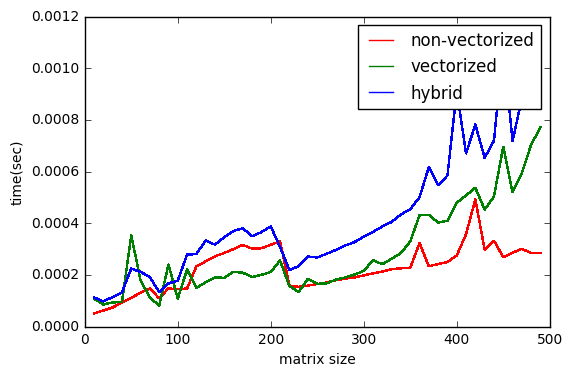

In [45]:
x_axis, nvec_dots, vec_dots, hybr_dots = get_measures (10, 500, 10)
plt.plot (x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot (x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot (x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.xlabel ("matrix size")
plt.ylabel ("time(sec)")
plt.legend()
plt.show()